In [1]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
df = pd.read_csv("data/concat.csv")
df

,edit_history_tweet_ids,id,text,label,clean_text
0,['1576050330114363392'],1576050330114363392,@joicehasselmann Bolsonaro NÃO quer aproveitad...,-1,Bolsonaro NÃO quer aproveitadores como você.
1,['1576050330110160901'],1576050330110160901,o bolsonaro é um anjo enviado de deus para nos...,1,o bolsonaro é um anjo enviado de deus para nos...
2,['1576050318852640769'],1576050318852640769,@AndradeRNegro2 @Loucosdovalle Bolsonaro é con...,1,Bolsonaro é contra o aborto e defende a vida...
3,['1576050318596399104'],1576050318596399104,@Victorrmsk É a milésima vez que ele fala ao v...,0,É a milésima vez que ele fala ao vivo que não...
4,['1576050309822287873'],1576050309822287873,"@OGloboPolitica Bolsonaro é tão fake, q até o ...",-1,"Bolsonaro é tão fake, q até o laranja q ele l..."
...,...,...,...,...,...
234,['1576039456552853504'],1576039456552853504,a pessoa não tem nem idade pra votar e ainda q...,-1,a pessoa não tem nem idade pra votar e ainda q...
235,['1576039448760156161'],1576039448760156161,A corrupção de Lula não causou estrago só no B...,-1,A corrupção de Lula não causou estrago só no B...
236,['1576039448093265920'],1576039448093265920,eu n aguento mais essa gnt falando de política...,-1,eu n aguento mais essa gnt falando de política...
237,['1576039446331281409'],1576039446331281409,@Emanuel_Jrz @jairbolsonaro @MariaFdaCabal O B...,1,O Brasil não quer mais essa gangue na polít...


In [5]:
df.shape

(162980, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [7]:
#Check null elements

df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [8]:
# Check duplicate rows

len(df)-len(df.drop_duplicates())

1

In [9]:
count = df['clean_text'].str.split().str.len()
df['num_words'] = count
df.head()

,clean_text,category,num_words
0,when modi promised “minimum government maximum...,-1.0,33.0
1,talk all the nonsense and continue all the dra...,0.0,13.0
2,what did just say vote for modi welcome bjp t...,1.0,22.0
3,asking his supporters prefix chowkidar their n...,1.0,34.0
4,answer who among these the most powerful world...,1.0,14.0


In [10]:
# Get max number of words in dataset

df['num_words'].max()

52.0

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Category')

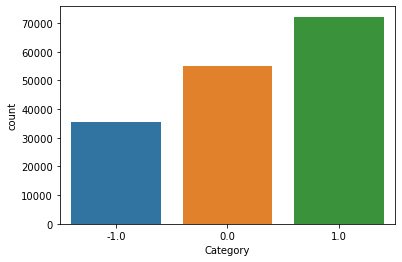

In [11]:
# Distribution of score data

sns.countplot(df['category'])
plt.xlabel('Category')